In [3]:
import pennylane as qml

In [4]:
li2 =qml.data.load("qchem", molname="Li2", bondlength=2.1, basis="STO-3G")

In [6]:
li2[0].molecule.alpha

[tensor([16.11957475,  2.93620066,  0.79465049], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([16.11957475,  2.93620066,  0.79465049], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False)]

In [7]:
li =qml.data.load("qchem", molname="LiH", bondlength=2.1, basis="STO-3G")
li[0].molecule.alpha

[tensor([16.11957475,  2.93620066,  0.79465049], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([3.42525091, 0.62391373, 0.1688554 ], requires_grad=False)]

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

def potential_energy_surface(symbols, bond_lengths):
    """Calculates the molecular energy over various bond lengths (AKA the 
    potential energy surface) using the Hartree Fock method.
    
    Args:
        symbols (list(string)): 
            A list of atomic symbols that comprise the diatomic molecule of interest.
        bond_lengths (numpy.tensor): Bond lengths to calculate the energy over.

        
    Returns:
        hf_energies (numpy.tensor): 
            The Hartree Fock energies at every bond length value.
    """


    hf_energies = []

    # Put your code here #

    return np.array(hf_energies)


def ground_energy(hf_energies):
    """Finds the minimum energy of a molecule given its potential energy surface.
    
    Args: 
        hf_energies (numpy.tensor): 

    Returns:
        (float): The minumum energy in units of hartrees.
    """

    ind = np.argmin(hf_energies)
    return hf_energies[ind]

def reaction():
    """Calculates the energy of the reactants, the activation energy, and the energy of 
    the products in that order.

    Returns:
        (numpy.tensor): [E_reactants, E_activation, E_products]
    """
    molecules = {
        "H2": 
            {"symbols": ["H", "H"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(0.5, 9.3, 0.3)}, 
        "Li2": 
            {"symbols": ["Li", "Li"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(3.5, 8.3, 0.3)}, 
        "LiH": 
            {"symbols": ["Li", "H"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(2.0, 6.6, 0.3)}
    }


    for molecule in molecules.keys():
        # Put your code here #
        # populate each molecule's E0 and E_dissociation values
        hf_energies  
    # Calculate the following and don't forget to balance the chemical reaction!
    E_reactants = molecules["H2"]["E0"] + molecules["Li2"]["E0"]
    E_activation = E_reactants + molecules["H2"]["E_dissociation"] + molecules["Li2"]["E_dissociation"]
    E_products = molecules["LiH"]["E0"]

    return np.array([E_reactants, E_activation, E_products])


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    output = reaction().tolist()
    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert np.allclose(solution_output, expected_output, rtol=1e-3)


Raniy days ar the forest retreat

In [60]:
import json
import pennylane as qml
import pennylane.numpy as np

def U():
    """
    Creates the gate that checks the parity of the number of forests.
    It should not return anything, you simply need to add the gates.
    """


    # Put your code here #
    Uni = np.array([
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]
    ])
    qml.CNOT([0, 8])
    qml.CNOT([0, 9])
    for i in range(0, 7):
        qml.CNOT([i, i+1])
        qml.ControlledQubitUnitary(Uni , control_wires=[i+1], wires=[8,9])
        qml.CNOT([i, i+1])

# These functions are responsible for testing the solution.


def run(test_case_input: str) -> str:

    input = json.loads(test_case_input)
    wires_input = [0,1,2,3,4,5,6,7]

    dev = qml.device("default.qubit", wires = 10, shots = 10)

    @qml.qnode(dev)
    def circuit():
      qml.BasisEmbedding(input, wires = wires_input)

      U()

      return qml.probs(wires = 8)

    return str(float(circuit()[1]))


def check(have: str, want: str) -> None:

    assert np.isclose(float(have), float(want)), "Wrong answer!"


# These are the public test cases
test_cases = [
    ('[1,0,1,1,0,1,1,1]', '1'),
    ('[0,0,0,0,0,1,0,1]', '0')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[1,0,1,1,0,1,1,1]'...
Correct!
Running test case 1 with input '[0,0,0,0,0,1,0,1]'...
Correct!


In [6]:
import pennylane as qml
from pennylane import numpy as np

In [55]:
dev = qml.device("default.qubit", wires = 10, shots = 10)
@qml.qnode(dev)
def circuit(code):
    qml.BasisEmbedding(code, wires = range(8))
    Uni = np.array([
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]
    ])
    qml.CNOT([0, 8])
    qml.CNOT([0, 9])
    for i in range(0, 7):
        qml.CNOT([i, i+1])
        qml.ControlledQubitUnitary(Uni , control_wires=[i+1], wires=[8,9])
        qml.CNOT([i, i+1])
    return qml.probs([8])
    

C:\Users\qwqwh\AppData\Local\Temp\ipykernel_18952\295076800.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


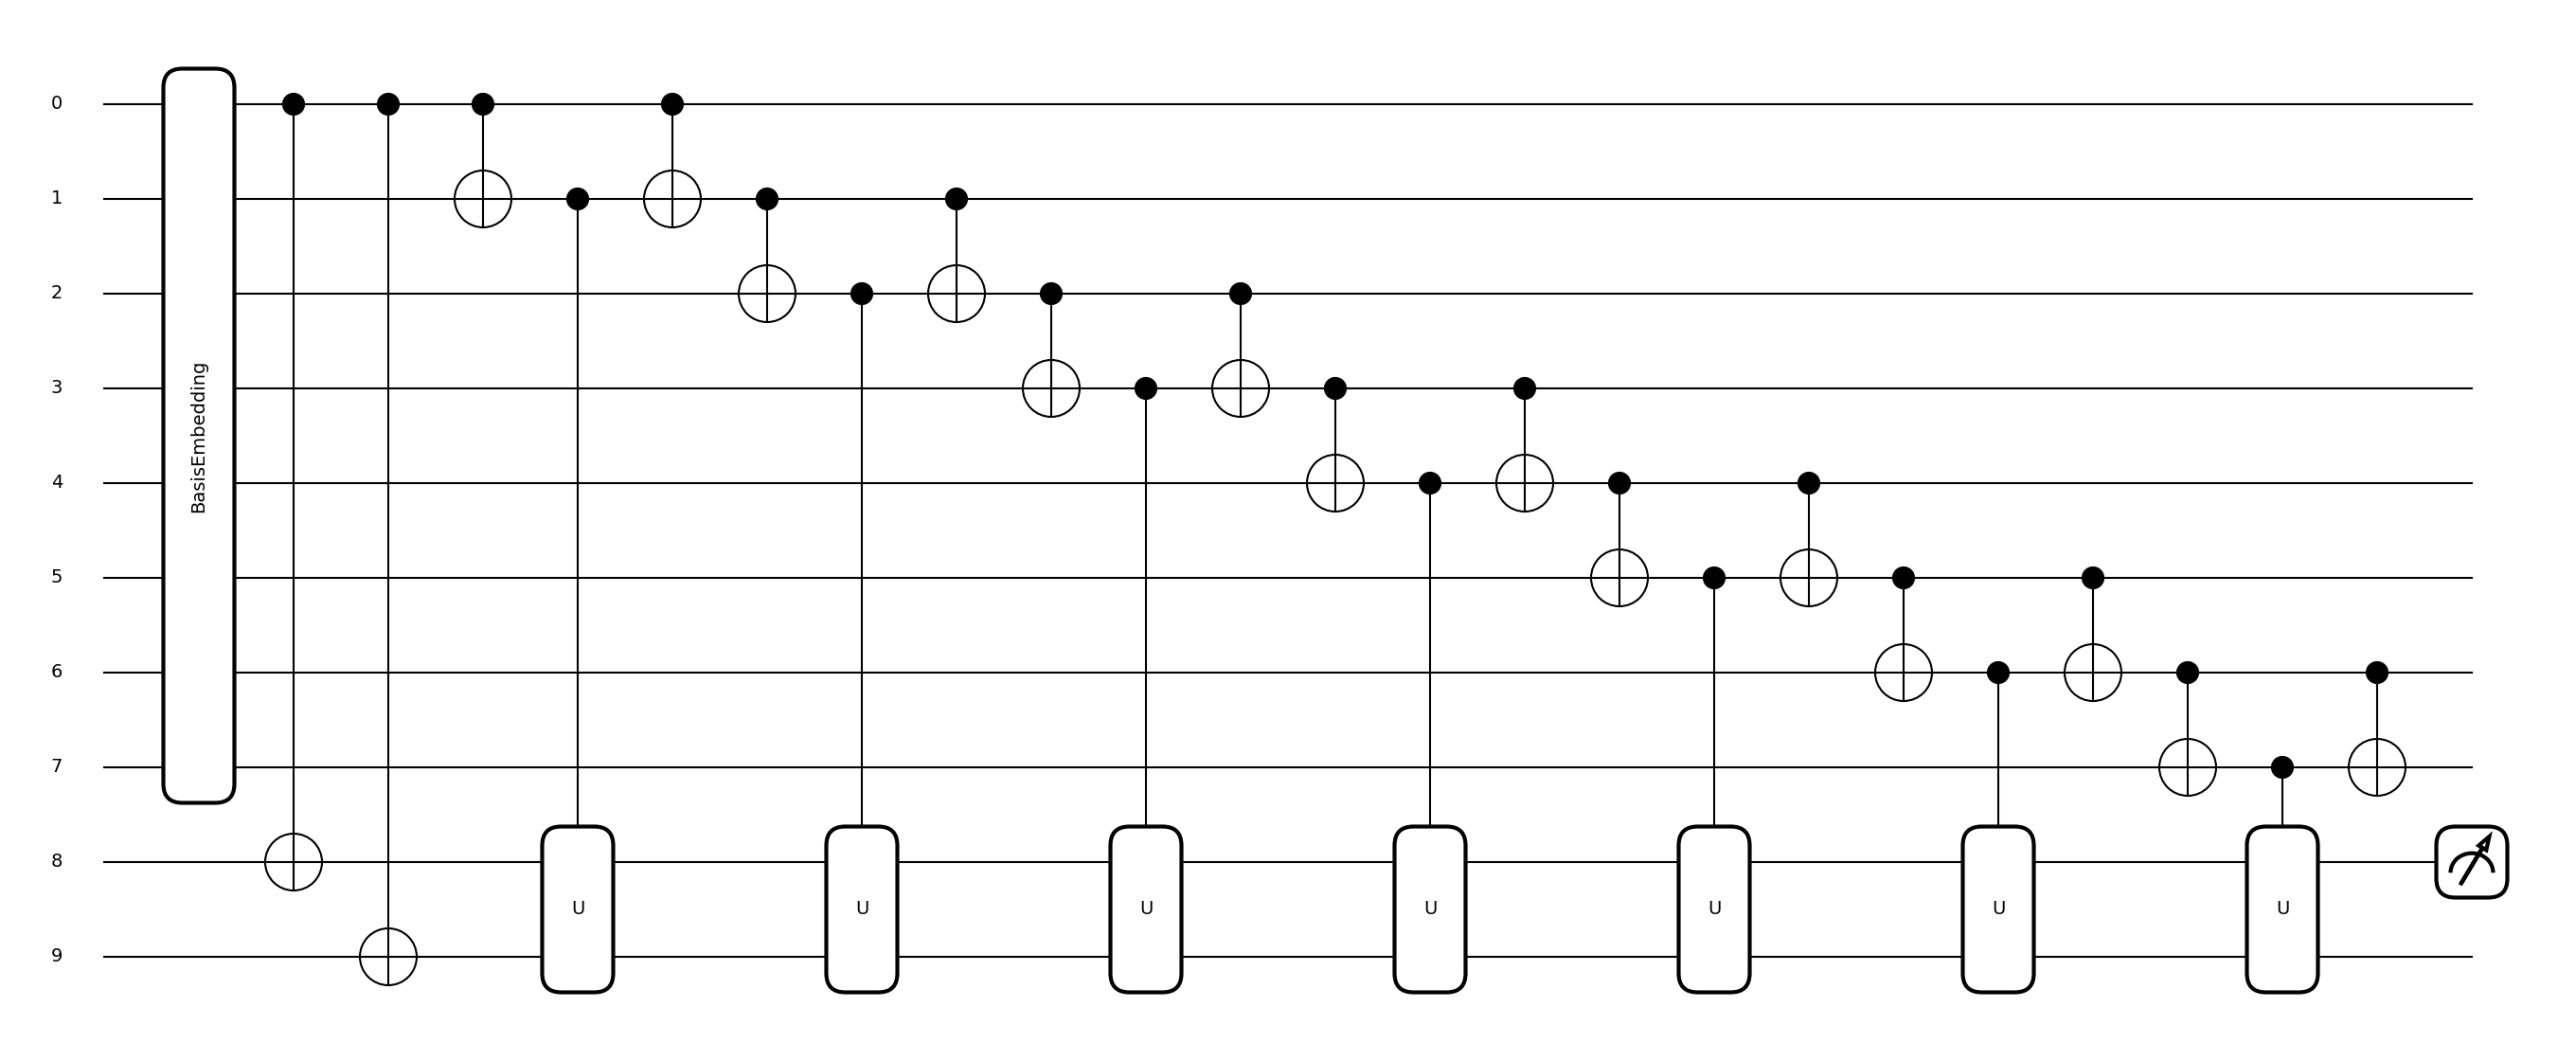

In [56]:
fig, ax = qml.draw_mpl(circuit)([1,0,1,1,0,1,1,1])
fig.show()

In [59]:
code = [1,0,1,1,0,1,1,1]
print(0 if circuit(code)[0] else 1)
count = 0
for i in range(7):
    if code[i] != code[i+1]:
        count +=1
print(count)


1
4


In [ ]:
[1,0,1,1,0,1,1,1] # error

In [1]:
import pennylane as qml
from pennylane import numpy as np

In [2]:
half_pi = np.pi / 2

dev_2qubit = qml.device('default.qubit', wires=[0,1])

@qml.qnode(dev_2qubit)
def prepare_phi1():
    qml.RY(half_pi, wires=[1])

    return qml.state()

@qml.qnode(dev_2qubit)
def prepare_psi_state():
    op_psi = qml.Identity(wires=[0]) @ qml.RY(half_pi, wires=[1])
    #op_psi = qml.prod(qml.CNOT(wires), qml.Identity(wires[0]) @ qml.RY(half_pi, wires[1]))
    print(qml.matrix(op_psi))
    print()
    qml.QubitUnitary(qml.matrix(op_psi), wires=[0,1])

    return qml.state()

C:\Users\qwqwh\AppData\Local\Temp\ipykernel_20736\1641180159.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


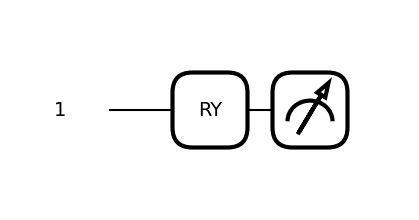

In [3]:
fig, ax = qml.draw_mpl(prepare_phi1)()
fig.show()

[[ 0.70710678+0.j -0.70710678-0.j  0.        +0.j  0.        -0.j]
 [ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        -0.j  0.70710678+0.j -0.70710678-0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]]



C:\Users\qwqwh\AppData\Local\Temp\ipykernel_20736\3944036551.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


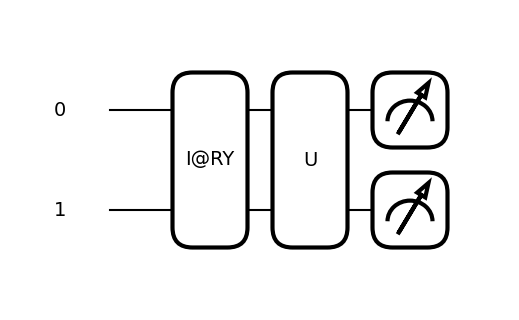

In [4]:
fig, ax = qml.draw_mpl(prepare_psi_state)()
fig.show()

In [8]:
import json
import pennylane as qml
import pennylane.numpy as np

def potential_energy_surface(symbols, bond_lengths):
    """Calculates the molecular energy over various bond lengths (AKA the 
    potential energy surface) using the Hartree Fock method.
    
    Args:
        symbols (list(string)): 
            A list of atomic symbols that comprise the diatomic molecule of interest.
        bond_lengths (numpy.tensor): Bond lengths to calculate the energy over.

        
    Returns:
        hf_energies (numpy.tensor): 
            The Hartree Fock energies at every bond length value.
    """


    big_d = bond_lengths.max()
    geometry = np.array([[0., 0., 0], [0., 0., big_d]], requires_grad = False)
    mol = qml.qchem.Molecule(symbols, geometry)
    E_dis = qml.qchem.hf_energy(mol)()
    hf_energies = [E_dis]
    for d in bond_lengths:
        geometry = np.array([[0., 0., 0], [0., 0., d]], requires_grad = False)

        mol = qml.qchem.Molecule(symbols, geometry)
        hf_e = qml.qchem.hf_energy(mol)()
        hf_energies.append(hf_e)

    return np.array(hf_energies)


def ground_energy(hf_energies):
    """Finds the minimum energy of a molecule given its potential energy surface.
    
    Args: 
        hf_energies (numpy.tensor): 

    Returns:
        (float): The minumum energy in units of hartrees.
    """

    ind = np.argmin(hf_energies)
    return hf_energies[ind]

def reaction():
    """Calculates the energy of the reactants, the activation energy, and the energy of 
    the products in that order.

    Returns:
        (numpy.tensor): [E_reactants, E_activation, E_products]
    """
    molecules = {
        "H2": 
            {"symbols": ["H", "H"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(0.5, 9.3, 0.3)}, 
        "Li2": 
            {"symbols": ["Li", "Li"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(3.5, 8.3, 0.3)}, 
        "LiH": 
            {"symbols": ["Li", "H"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(2.0, 6.6, 0.3)}
    }


    for molecule in molecules.keys():
        # Put your code here #
        # populate each molecule's E0 and E_dissociation values

        hf_energies = potential_energy_surface(molecules[molecule]["symbols"], molecules[molecule]["bond lengths"])
        molecules[molecule]["E0"] = ground_energy(hf_energies)
        molecules[molecule]["E_dissociation"] = hf_energies[0]
    # Calculate the following and don't forget to balance the chemical reaction!
    E_reactants = molecules["H2"]["E0"] + molecules["Li2"]["E0"]
    E_activation = E_reactants + molecules["H2"]["E_dissociation"] + molecules["Li2"]["E_dissociation"]
    E_products = molecules["LiH"]["E0"]

    return np.array([E_reactants, E_activation, E_products])


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    output = reaction().tolist()
    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert np.allclose(solution_output, expected_output, rtol=1e-3)


In [9]:
reaction()

tensor([-15.7553572 , -30.86135809,  -7.86326723], requires_grad=True)